In [56]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label
from uncertainties import ufloat
import uncertainties as ct
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bblib

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

In [57]:
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
dc = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0) 
bb = rd.readImages('data/02_rawdata/01_Stepwedges/bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
bbes = rd.readImages('data/02_rawdata/01_Stepwedges/water_bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [58]:
maskbb,rbb,cbb = bblib.get_black_bodies(bb, greythres=15000, areas=[0, 1000] , R=5)
maskbbes,rbbes,cbbes = bblib.get_black_bodies(bbes, greythres=12500, areas=[0, 1000], R=5)
maskbb[1000:, :] = 0
maskbbes[150:230, :] = 0
img_corr_bb = bblib.compute_scatter_image(bb,rbb,cbb)
img_corr_bbes = bblib.compute_scatter_image(bbes, rbbes, cbbes)

### Normalize (Beer Lambert) - with caveats

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$ 

In [118]:
ob_new = ob - dc - img_corr_bb
ob_new[ob_new<1]=1
ob_new = ob_new[::-1]

water_new = water - dc - img_corr_bbes
water_new[water_new<1]=1
water_new = water_new[::-1]

d0=ob_new[0:600,:].mean()
d=water_new[0:600,:].mean()

p = -np.log(d0/d*(water_new)/(ob_new))

In [119]:
d0, d, d0/d

(16363.254992591837, 19380.505077991053, 0.8443151985328972)

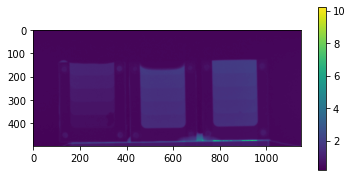

In [120]:
plt.imshow(p[500:1000,0:1150])
plt.colorbar(shrink=0.75);

In [121]:
p1=p[:,200:250].mean(axis=1)

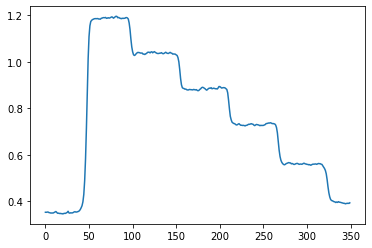

In [122]:
plt.plot(p1[600:950])

In [123]:
dp1 = p1[:-1]-p1[1:]
mask = dp1<0.005
l=label(mask)
p10=p1[1:]
np.mean(p10[l==0]) 

3.0660928848854403